In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import vmap, jit
import jax.numpy as jnp
from pathlib import Path
import numpy as np
from einops import rearrange
import jax
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from maps.utils.plot import scatter_movie, imshow_movie
from maps.io.load import load_multi
from maps.utils.misc import randkey


In [3]:
cfgs, df = load_multi('clevrer', 'dit_rollout')

did not load:  results/clevrer/multi/dit_rollout/97
did not load:  results/clevrer/multi/dit_rollout/117
did not load:  results/clevrer/multi/dit_rollout/94
did not load:  results/clevrer/multi/dit_rollout/113
did not load:  results/clevrer/multi/dit_rollout/119
did not load:  results/clevrer/multi/dit_rollout/95
did not load:  results/clevrer/multi/dit_rollout/93
did not load:  results/clevrer/multi/dit_rollout/115


In [6]:
pd.set_option('display.max_rows', None)


In [20]:
df = df.sort_values("fvd_test")
df_cols = df[
    [
        "fvd_test",
        "ssim_test",
        "psnr_test",
        "sample.bs_t",
        "loss.loss_fn",
        "final_loss",
        "loss.label_noise",
        "optimizer.iters",
        "sample.label_dim", 
        "sample.label_in",
        "net.size",
    ]
]
df_cols.head(25)

,fvd_test,ssim_test,psnr_test,sample.bs_t,loss.loss_fn,final_loss,loss.label_noise,optimizer.iters,sample.label_dim,sample.label_in,net.size
96,108.125619,0.920049,30.317719,1,dt,0.062093,0.4,100000,256,conditional,m
83,110.239803,0.920731,30.396621,1,rollout,0.043135,0.4,250000,256,conditional,m
62,112.219826,0.917938,30.146060,1,dt,0.085519,0.4,50000,256,conditional,m
24,113.217227,0.918114,30.179493,1,rollout,0.086957,0.4,50000,256,conditional,m
69,114.002304,0.922275,30.573850,1,dt,0.034114,0.4,500000,256,conditional,m
78,114.131491,0.916987,30.047580,1,rollout,0.077407,0.0,50000,256,conditional,m
22,114.306519,0.918489,30.217342,2,rollout,0.079776,0.4,100000,256,conditional,m
77,114.892553,0.921991,30.603158,1,rollout,0.034270,0.4,500000,256,conditional,m
57,115.797310,0.921751,30.517098,1,dt,0.048790,0.4,250000,256,conditional,m
59,116.217815,0.921093,30.385794,2,dt,0.044911,0.4,100000,256,conditional,m


In [9]:
def sns_plotter(**kwargs):

    def plotter(df, ax):
        sns.lineplot(data=df, ax=ax, **kwargs)

    return plotter


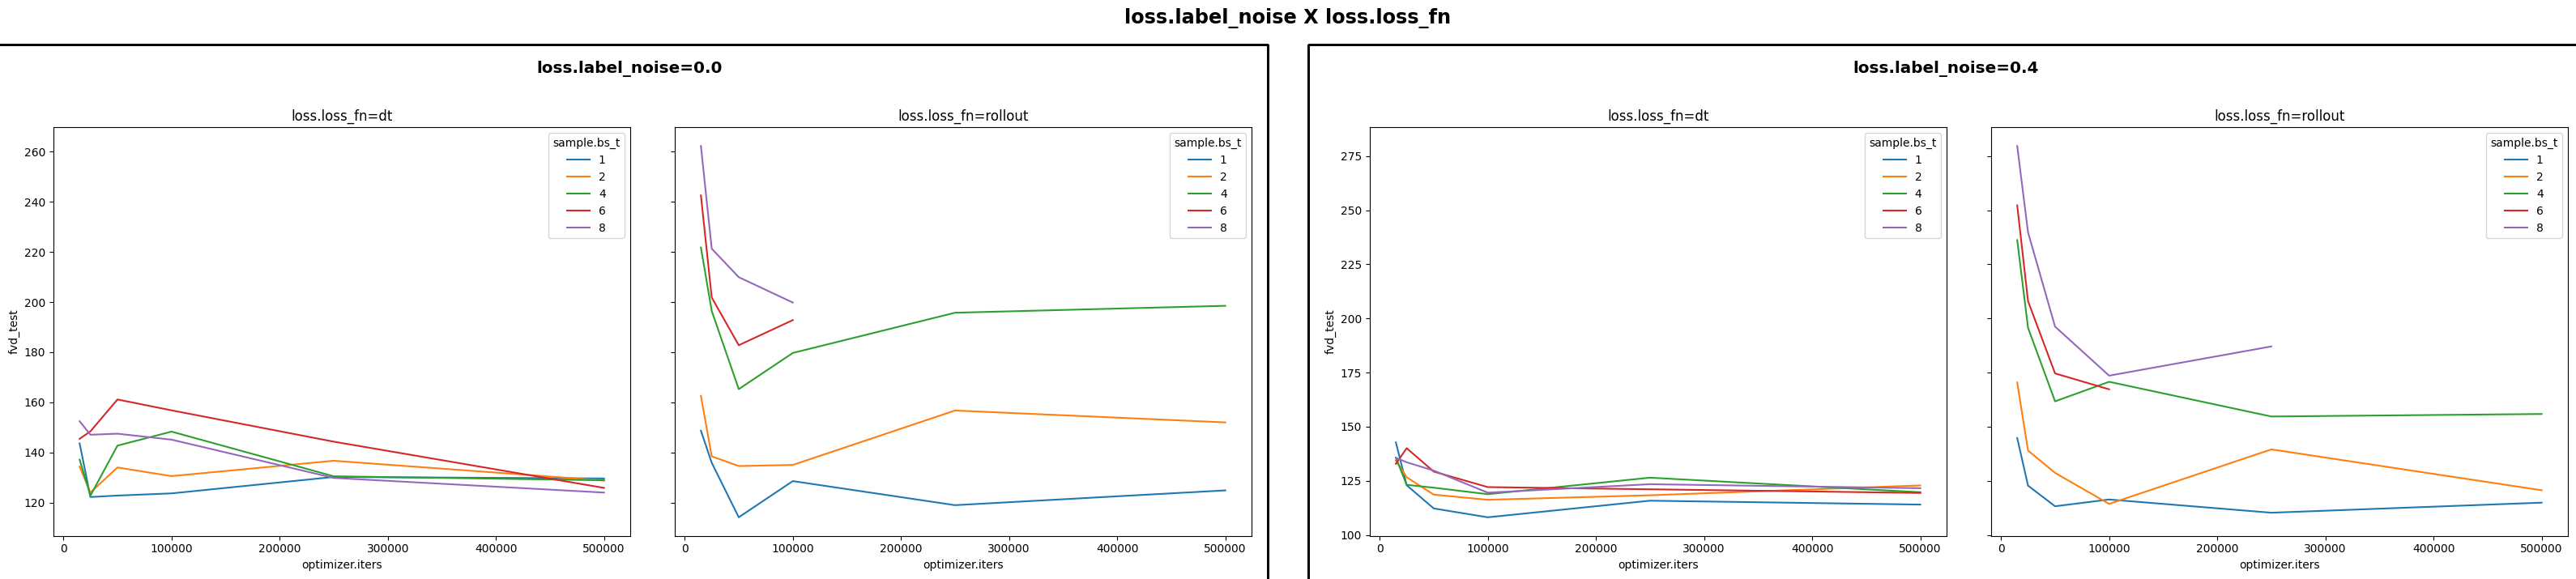

In [16]:
from maps.utils.multiplot import plot_df_nested
plotter = sns_plotter(x='optimizer.iters', y='fvd_test', hue='sample.bs_t', palette='tab10')
plot_df_nested(df, plotter, layers=['loss.label_noise', 'loss.loss_fn'])


# plotter = sns_plotter(x='sample.label_dim', y='fvd_test-30', hue='optimizer.iters')
# plot_df_nested(df, plotter, layers=['loss.label_noise'])

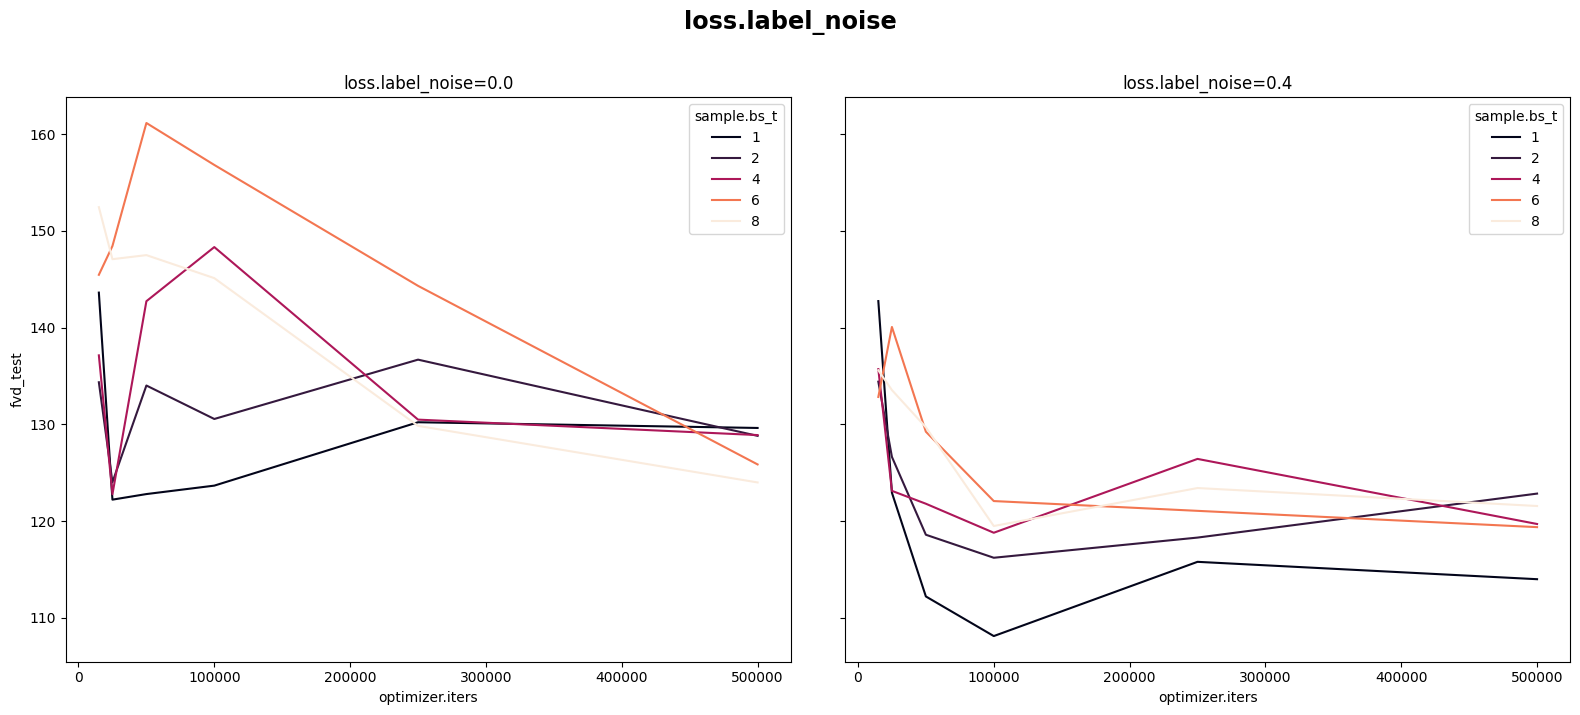

In [13]:
plotter = sns_plotter(x='optimizer.iters', y='fvd_test', hue='sample.bs_t', palette='tab10')
plot_df_nested(df.query("`loss.loss_fn` == 'dt'"), plotter, layers=['loss.label_noise'])
